In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ISLP.bart import BART
from sklearn.tree import DecisionTreeRegressor
import sklearn.model_selection as skm

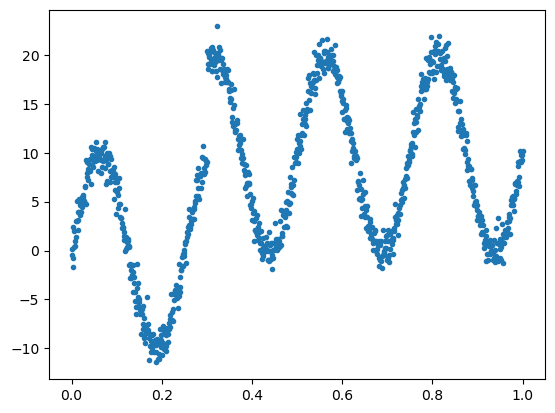

In [12]:
np.random.seed(2)
n = 1000
sigma = 1
# x = np.linspace(0, 1, n)
# y = np.piecewise(x, [x < 0.2, (x >= 0.2) & (x < 0.4), (x >= 0.4) & (x < 0.6),(x >= 0.6) & (x < 0.8),x>=0.8],
#                  [0, 2, -3, 3,-2])
# y = y * 10
# mu = y.copy()
# y += np.random.normal(0, sigma, n)

x = np.linspace(0, 1, n)
def heavisine_function(x, freq=4, offset=0.3, height=1):
    y = np.sin(2 * np.pi * freq * x) + height * (x > offset)
    return y
y = heavisine_function(x)
y = y * 10
mu = y.copy()
y += np.random.normal(0, sigma, n)

# y = np.zeros(n)
# y[x > 0.5] = 10
# mu = y.copy()
# y += np.random.normal(0, sigma, n)

# x = np.linspace(-2, 2, n)
# a, b, c = 1, 2, 3
# y = a * x**2 + b * x + c
# y = y * 10
# mu = y.copy()
# y += np.random.normal(0, sigma, n)

# x = np.linspace(-1, 1, n)
# a, b, c = 1, 0.5, 0.1
# y = a * np.exp(-(x - b)**2 / (2 * c**2))
# y = y * 10
# mu = y.copy()
# y += np.random.normal(0, sigma, n)

# x = np.linspace(-2, 2, n)
# a, b = 1, 2
# y = a * np.tanh(b * x)
# y = y * 10
# mu = y.copy()
# y += np.random.normal(0, sigma, n)

# x = np.linspace(-1, 1, n)
# y = np.piecewise(x, [x < 0.3, (x >= 0.3) & (x < 0.6), x >= 0.6],
#                  [lambda x: 2 * x, lambda x: 0.5 * x + 0.6, lambda x: 3 * x - 1.2])
# y = y * 10
# mu = y.copy()
# y += np.random.normal(0, sigma, n)

# x = np.linspace(0, 2 * np.pi, n)  # Adjust the range to include multiple sine periods
# amplitude = 10
# y = amplitude * np.sin(x)
# mu = y.copy()
# y += np.random.normal(0, sigma, n)

# plot x ,y 
plt.plot(x, y, '.')
plt.show()

In [15]:
reg = DecisionTreeRegressor(max_depth=None)
reg.fit(x.reshape(-1, 1), y)
ccp_path = reg.cost_complexity_pruning_path(x.reshape(-1, 1), y)
kfold = skm.KFold(5,
                  shuffle=True,
                  random_state=10)
grid = skm.GridSearchCV(reg,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
G = grid.fit(x.reshape(-1, 1), y)
best_ = grid.best_estimator_


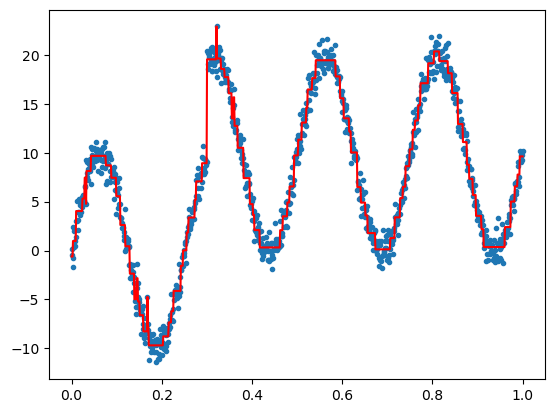

In [16]:
plt.plot(x, y, '.')
plt.plot(x,best_.predict(x.reshape(-1, 1)), 'r')
plt.show()

In [17]:
bart = BART(random_state=0, burnin=10, ndraw=30)
bart.fit(x.reshape(-1,1), y)

BART(burnin=10, ndraw=30, random_state=0)

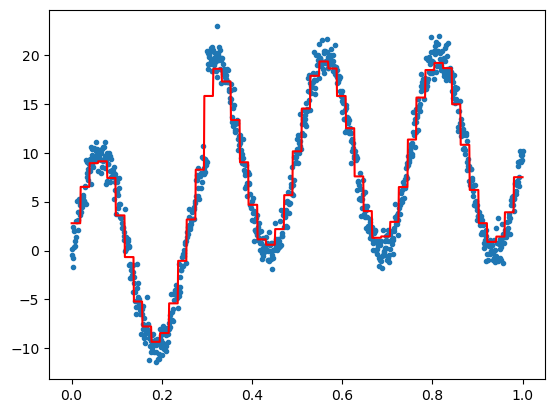

In [18]:
plt.plot(x, y, '.')
plt.plot(x,bart.predict(x.reshape(-1, 1)), 'r')
plt.show()